In [13]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
import sklearn.cross_validation
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
boston = load_boston()


In [14]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
print (boston.data.shape)

(506, 13)


In [16]:
import pandas as pd

# Convertendo o dataset em um DataFrame pandas
atributos_casas = pd.DataFrame(boston.data)
atributos_casas.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
# Convertendo o título das colunas para o nome dos atributos
atributos_casas.columns = boston.feature_names
atributos_casas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
# Pegando os precos das casas
preco_casas = pd.DataFrame(boston.target)

In [19]:
atributos_casas [ ' PRICE ' ] = boston.target
atributos_casas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
atributos_casas.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [21]:
X = atributos_casas.drop ( ' PRICE ' , axis  =  1 )
Y = atributos_casas [ ' PRICE ' ]

In [22]:
X_treino, X_teste, Y_treino, Y_teste = sklearn.cross_validation.train_test_split (X, Y, test_size  =  0.33 , random_state  =  5 )
print (X_treino.shape)
print (X_teste.shape)
print (Y_treino.shape)
print (Y_teste.shape)


(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5, 1.0, ' Precos vs Precos Previstos:  $Y_i$ vs $\\hat{Y}_i$')

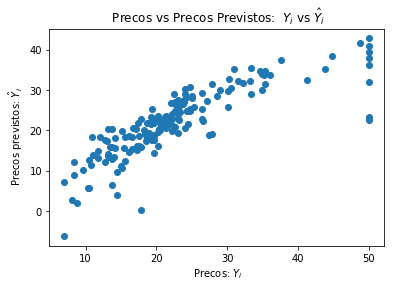

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit (X_treino, Y_treino)

Y_pred = lr.predict (X_teste)

plt.scatter (Y_teste, Y_pred)
plt.xlabel ( " Precos: $Y_i$" )
plt.ylabel ( " Precos previstos: $\hat{Y}_i$" )
plt.title ( " Precos vs Precos Previstos:  $Y_i$ vs $\hat{Y}_i$" )



In [24]:
Y_teste = np.reshape(Y_teste[0],(-1,13))
lr.fit(Y_teste,Y_pred)

ValueError: cannot reshape array of size 1 into shape (13)

ValueError: Expected 2D array, got 1D array instead:
array=[37.6 27.9 22.6 13.8 35.2 10.4 23.9 29.  22.8 23.2 33.2 19.  20.3 36.1
 24.4 17.2 17.9 19.6 19.7 15.   8.1 23.  44.8 23.1 32.2 10.8 23.1 21.2
 22.2 24.1 17.3  7.  12.7 17.8 26.4 19.6 25.1  8.3 48.8 34.9 13.8 14.4
 30.1 12.7 27.1 24.8  7.  20.5 21.5 14.  20.4 22.2 21.4 13.5 19.4 24.7
 43.8 14.1 28.6 19.7 16.8 23.2 16.2 41.3 22.7  8.3 18.4 24.7 21.7 20.6
 16.7 22.1 19.4 27.5 27.9 30.1 17.4 15.4 31.  14.2 19.6 50.  21.7 11.7
 19.4 13.  17.5  9.7 20.3 18.6 50.  19.6 21.4 18.4 22.6 25.  15.6 26.6
 22.4 13.1 23.  24.5 13.1 50.   8.8 20.6 12.1 50.  24.1 16.1 23.9 24.3
 13.1 30.3 15.2 13.8 26.4 16.6 18.9 17.6 18.7 33.4 20.7 17.1 23.4 26.5
 21.4 21.5 19.2 50.  50.  23.  10.5 17.8 10.9 21.  13.8 10.5 22.2 30.5
 19.4 15.6 20.2 19.3 34.6 50.  24.  18.7 19.8 22.5 13.3 50.  11.8 11.
 23.7 35.4 15.2 24.4 33.4 31.6 13.4 34.9 14.4 35.4 25.3 18.3 16.6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

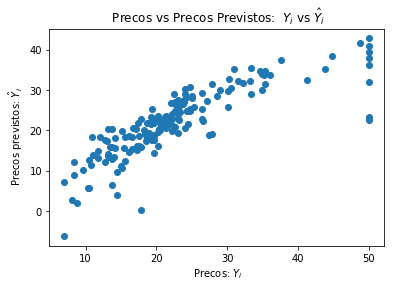

In [25]:
plt.figure()
plt.scatter (Y_teste, Y_pred)
plt.xlabel ( " Precos: $Y_i$" )
plt.ylabel ( " Precos previstos: $\hat{Y}_i$" )
plt.title ( " Precos vs Precos Previstos:  $Y_i$ vs $\hat{Y}_i$" )
plt.plot(Y_teste,lr.predict(Y_teste),linewidth=3)
plt.grid()
plt.show()

In [ ]:
mse = sklearn.metrics.mean_squared_error(Y_teste, Y_pred)

In [ ]:
print(mse)

# Treinando um modelo de regressão polinomial¶

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [ ]:
degree = 11

modelo_polinomial = make_pipeline(PolynomialFeatures(degree), Ridge())
modelo_polinomial.fit(Y_teste, Y_pred)

In [ ]:
print("Erro  Medio Quadratico = ", sklearn.metrics.mean_squared_error(Y_pred,modelo_polinomial.predict(Y_teste)))

In [ ]:
plt.figure()
plt.scatter (Y_teste, Y_pred)
plt.xlabel ( " Precos: $Y_i$" )
plt.ylabel ( " Precos previstos: $\hat{Y}_i$" )
plt.title ( " Precos vs Precos Previstos:  $Y_i$ vs $\hat{Y}_i$" )
plt.plot(Y_teste,modelo_polinomial.predict(Y_teste),linewidth=3)
plt.grid()
plt.show()

In [ ]:
print(mse)
print(sklearn.metrics.mean_squared_error(Y_pred,modelo_polinomial.predict(Y_teste)))